In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pujahbalu","key":"142bc8cd0e9a95bd361cd2c93b135f7a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d emmarex/plantdisease

Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown


In [ ]:
import zipfile

with zipfile.ZipFile("plantdisease.zip", "r") as zip_ref:
    zip_ref.extractall("plant_disease_dataset")

In [ ]:
import os

base_path = 'plant_disease_dataset/PlantVillage'
classes = os.listdir(base_path)
print("Classes found:", classes)

Classes found: ['Potato___healthy', 'Tomato_Bacterial_spot', 'Pepper__bell___healthy', 'Tomato_Septoria_leaf_spot', 'Tomato_healthy', 'Pepper__bell___Bacterial_spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Leaf_Mold', 'Tomato__Tomato_mosaic_virus', 'Tomato_Late_blight', 'Potato___Late_blight', 'Tomato__Target_Spot', 'Tomato_Early_blight', 'Potato___Early_blight']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


517/517 ━━━━━━━━━━━━━━━━━━━━ 558s 1s/step - accuracy: 0.3331 - loss: 2.0831 - val_accuracy: 0.7363 - val_loss: 0.8507
Epoch 2/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 563s 1s/step - accuracy: 0.6497 - loss: 1.0723 - val_accuracy: 0.7807 - val_loss: 0.6695
Epoch 3/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 556s 1s/step - accuracy: 0.7012 - loss: 0.8894 - val_accuracy: 0.8270 - val_loss: 0.5381
Epoch 4/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 545s 1s/step - accuracy: 0.7458 - loss: 0.7551 - val_accuracy: 0.8370 - val_loss: 0.4879
Epoch 5/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 545s 1s/step - accuracy: 0.7750 - loss: 0.6536 - val_accuracy: 0.8387 - val_loss: 0.4947
Epoch 6/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 544s 1s/step - accuracy: 0.7995 - loss: 0.5793 - val_accuracy: 0.8763 - val_loss: 0.3920
Epoch 7/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 544s 1s/step - accuracy: 0.8194 - loss: 0.5193 - val_accuracy: 0.8819 - val_loss: 0.3426
Epoch 8/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 560s 1s/step - accuracy: 0.8505 - loss: 0.4411 - val_accuracy: 0.901

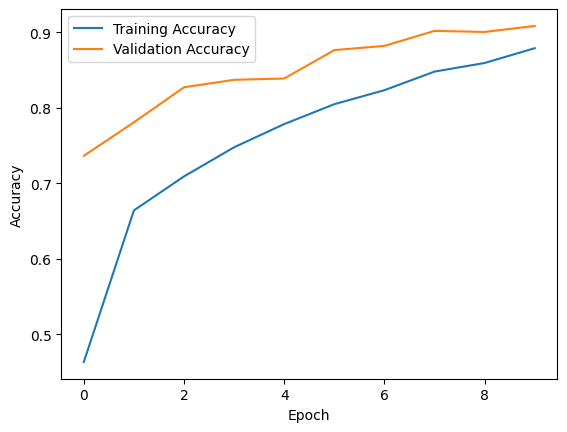

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()